<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/S%26S%3AIntroducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x(t)= exp(t*(1.0*I*omega + sigma))


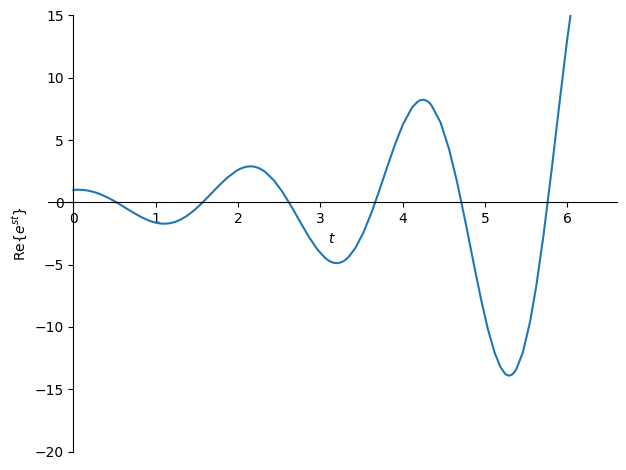

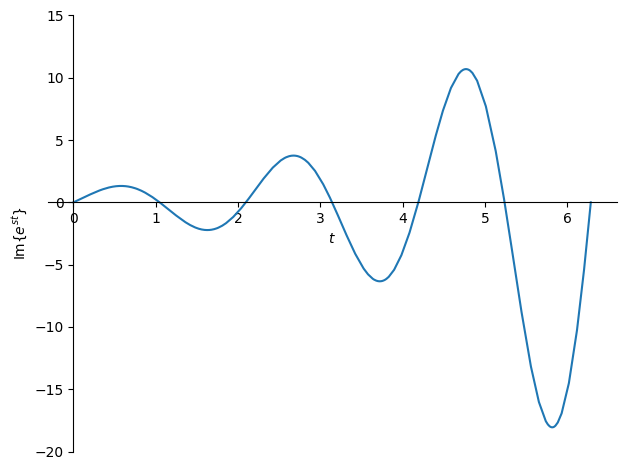

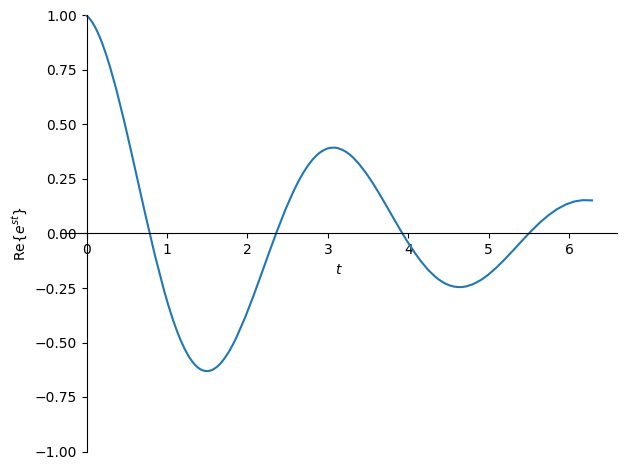

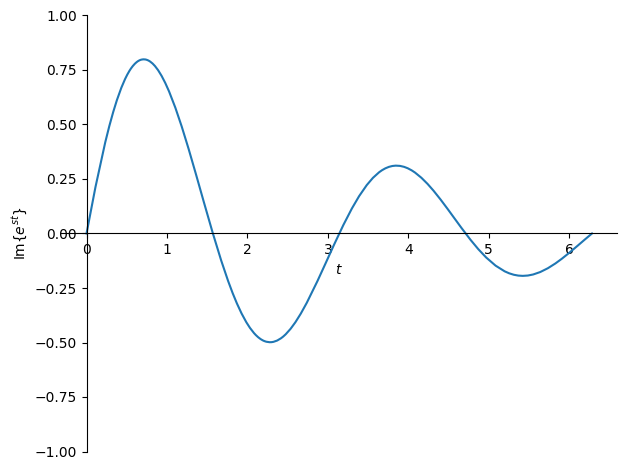

x(t)= exp(t*(1.0*I*omega + sigma))


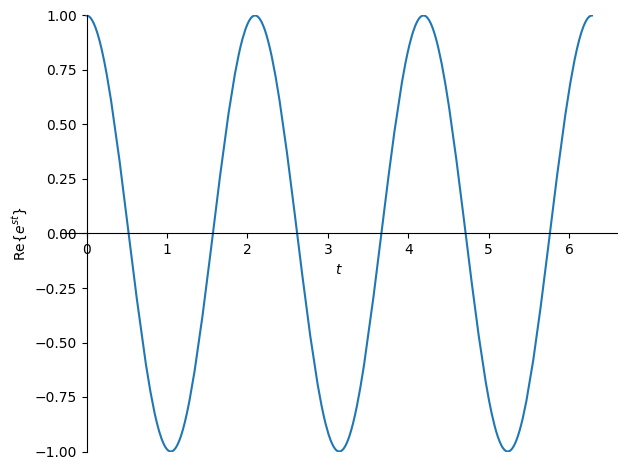

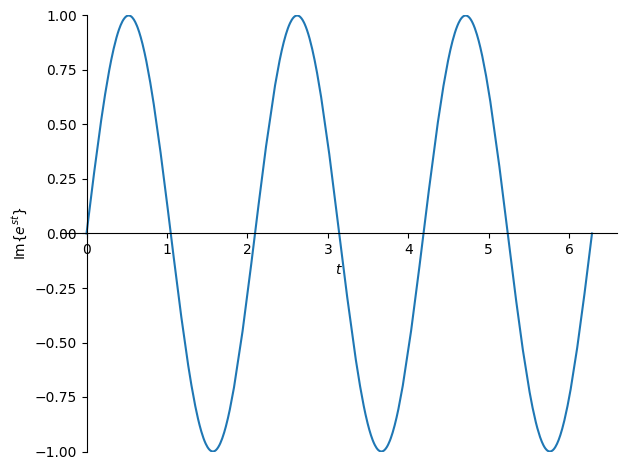

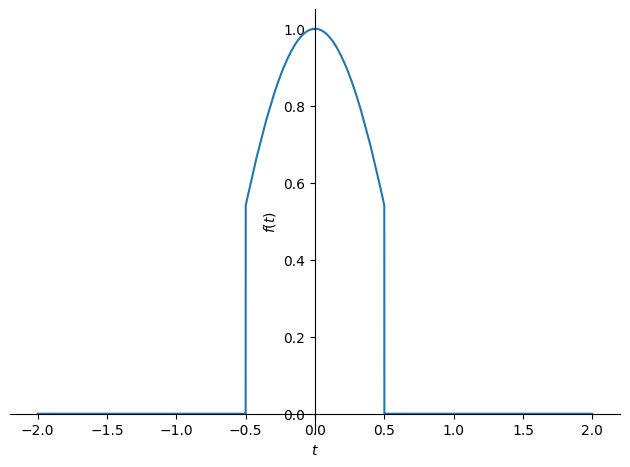

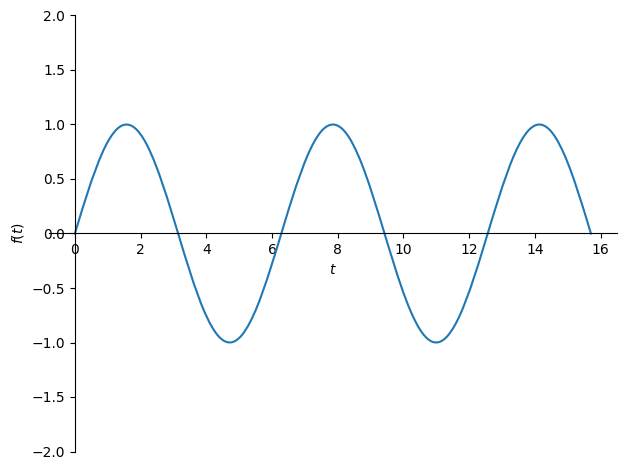

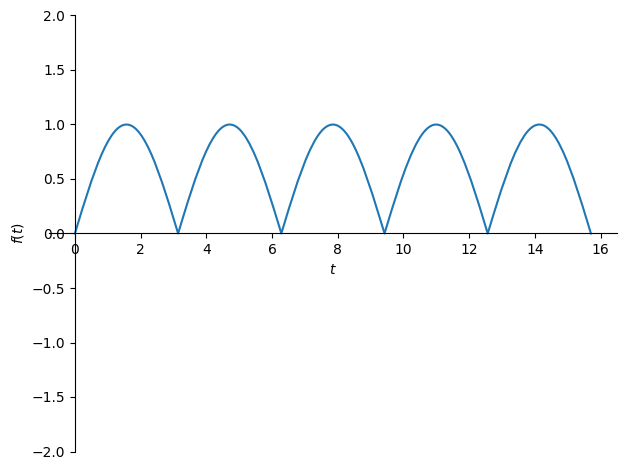

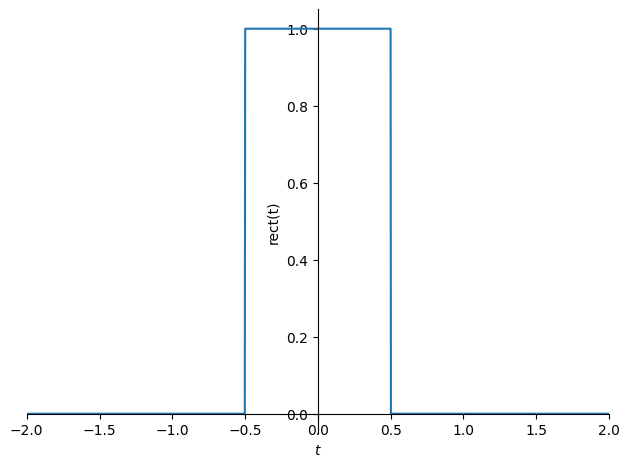

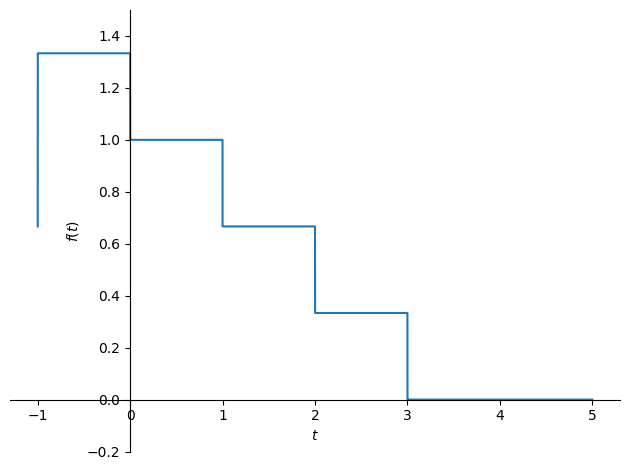

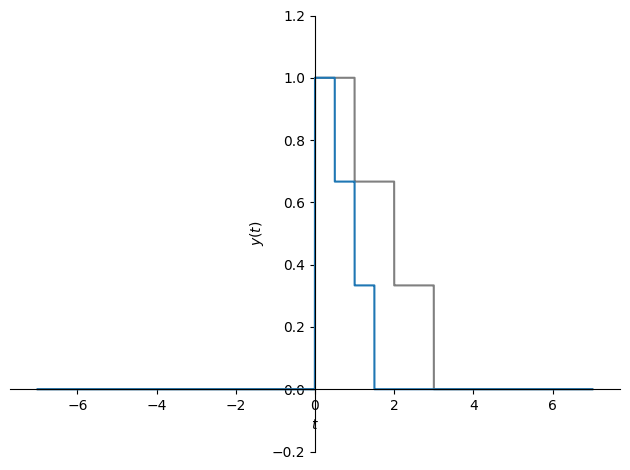

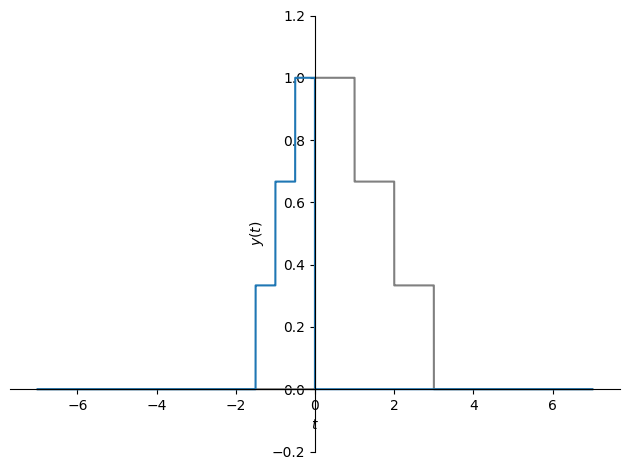

interactive(children=(FloatText(value=0.0, description='Valor de f:', step=0.1), Output()), _dom_classes=('wid…

In [17]:
#Señales Estándar.

import sympy as sym
t, sigma, omega=sym.symbols('t sigma omega', real=True)
s=sigma+1j*omega
x=sym.exp(s*t)

#Pruebe otros valores de omega y sigma para crear señales con amplitud creciente.

y=x.subs({omega: 3, sigma : 0.5})
print(r'x(t)=',x)
sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}', ylim=[-20,15])
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}', ylim=[-20,15]);

#Pruebe otros valores de omega y sigma para crear señales con amplitud decreciente.

y=x.subs({omega: 2, sigma: -0.3})
sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}', ylim=[-1,1])
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}', ylim=[-1,1])

#Pruebe otros valores de omega y sigma para crear señales con amplitud constante.

y=x.subs({omega: 3, sigma : 0})
print(r'x(t)=',x)
sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}', ylim=[-1,1])
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}', ylim=[-1,1]);

#Compruebe la propiedad de selectividad, para un impulso de Dirac desplazado d(t-T) y probar los resultados.

tau=sym.symbols('tau', real=True)
a=sym.symbols('a', real=True)
f=sym.Function('f')(t)
deltaT=sym.DiracDelta(a*(t-tau))
deltaT
sym.integrate(deltaT*f, (t, -sym.oo, sym.oo))

#Use la función rect(t) para construir una función Cos(wt) con w=2, la cual se enciende en t=-1/2 y se apaga en t=1/2.

t, omega=sym.symbols('t omega', real=True)
rect=(sym.Heaviside(t+1/2)-sym.Heaviside(t-1/2))
x=sym.cos(omega*t)
y=x.subs({omega: 2})
rect
sym.plot(rect*y, (t, -2, 2))

#Genere un rectificador de onda completa utilizando la función sgn(t).

t=sym.symbols('t', real=True)
x=sym.sin(t)
y=sym.sign(x)
SeñalRectificada=x*y

px=sym.plot(x, (t, 0, 5*sym.pi), ylim=[-2,2])
py=sym.plot(SeñalRectificada, (t, 0, 5*sym.pi), ylim=[-2,2])

#Operaciones Básicas.

#Agregar otro escalón al principio de la señal escalera.

t=sym.symbols('t', real=True)
rect=sym.Heaviside(t+0.5)-sym.Heaviside(t-0.5)
sym.plot(rect, xlim=[-2,2], ylabel=r'rect(t)')

x=rect.subs(t, t-1/2)+2/3*rect.subs(t, t-3/2)+1/3*rect.subs(t, t-5/2)+4/3*rect.subs(t, t+1/2)
sym.plot(x, (t,-1, 5), ylim=[-0.2,1.5])

#Modifique el ejemplo anterior para que la señal se comprima y para que la señal se escale y se invierta. ¿Qué factor de escalada da como resultado un
#estiramiento/compresiónen este contexto?

t, a=sym.symbols('t a', real=True)
rect=sym.Heaviside(t+0.5)-sym.Heaviside(t-0.5)
x=rect.subs(t, t-1/2)+2/3*rect.subs(t, t-3/2)+1/3*rect.subs(t, t-5/2)
y=x.subs(t, a*t)

#Señal Comprimida.

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py=sym.plot(y.subs(a,2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

#Señal Escalonada e Invertida.

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,-2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

#Señales Periódicas y Aperiódicas.

import ipywidgets
def senial(f):

  n=arange(0, 50)
  plt.figure(1, (25, 10))
  x=cos(2*pi*f*n)
  plt.stem(n, x, use_line_collection=True)
  plt.grid()
  plt.margins(x=.01)
  plt.title('Gráfica de la señal $x[n] = cos(2\pi \cdot {} \cdot n)$'.format(f), fontsize=15)
  plt.xlabel('Muestras')
  plt.show()
display(ipywidgets.interactive(senial, f=ipywidgets.FloatText(value=0, step=.1, description='Valor de f:')))